In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set_style("whitegrid")

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/satya/Downloads/house_prices.csv")

# Display the first few rows
data

,Size (sq ft),Location,Number of Rooms,Price ($)
0,3674,Rural,1,628008
1,1360,Rural,1,285780
2,1794,Rural,3,324070
3,1630,Suburban,6,434767
4,1595,Suburban,3,419380
...,...,...,...,...
1995,2554,Rural,3,745638
1996,2680,Urban,4,724447
1997,1056,Urban,3,288032
1998,1325,Urban,1,240295


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Summary statistics of numerical columns
numerical_summary = data.describe()

missing_values, numerical_summary

(Size (sq ft)       0
 Location           0
 Number of Rooms    0
 Price ($)          0
 dtype: int64,
        Size (sq ft)  Number of Rooms     Price ($)
 count   2000.000000      2000.000000  2.000000e+03
 mean    2282.193000         3.502000  4.526126e+05
 std     1026.460304         1.723218  2.460998e+05
 min      501.000000         1.000000  5.852400e+04
 25%     1398.250000         2.000000  2.577278e+05
 50%     2278.500000         3.000000  4.180485e+05
 75%     3231.500000         5.000000  6.115922e+05
 max     3999.000000         6.000000  1.176490e+06)

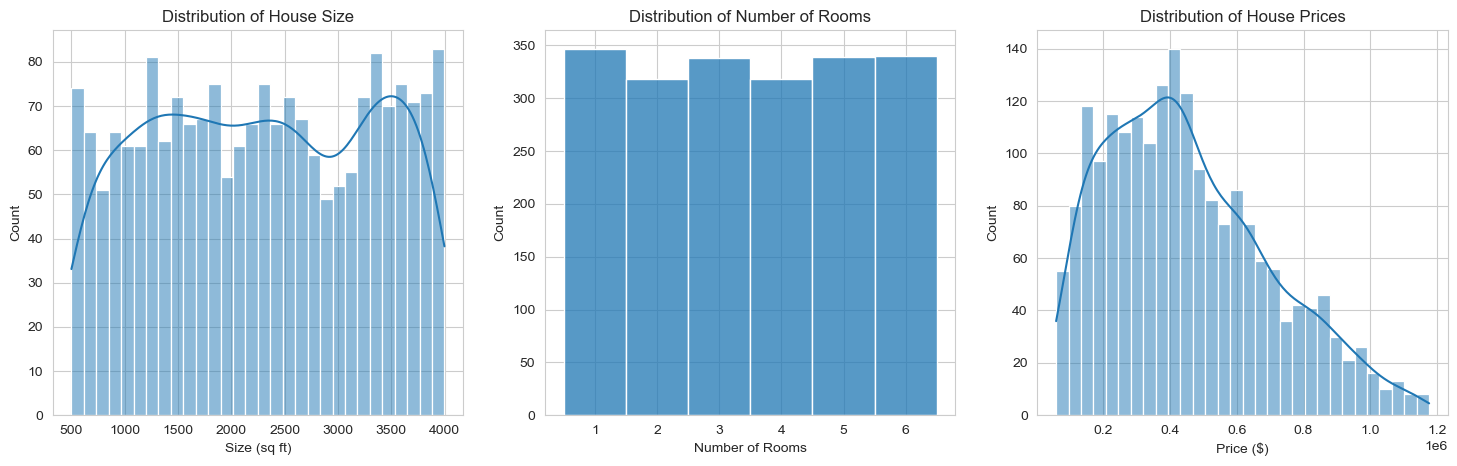

In [4]:
# Plot distributions of numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data["Size (sq ft)"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of House Size")

sns.histplot(data["Number of Rooms"], bins=6, discrete=True, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Number of Rooms")

sns.histplot(data["Price ($)"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of House Prices")

plt.show()

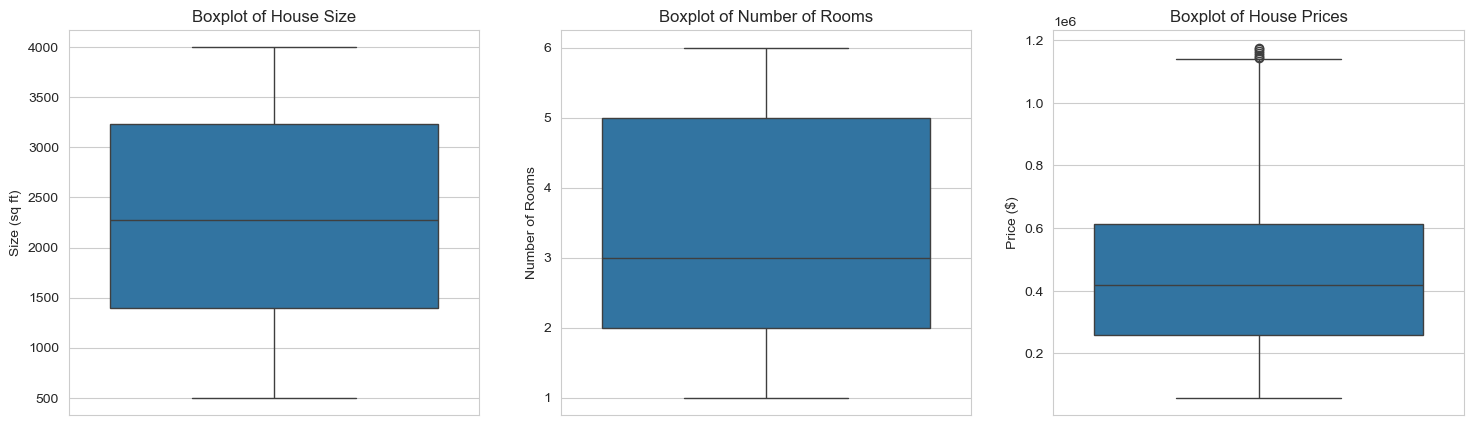

In [5]:
# Plot boxplots to detect outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=data["Size (sq ft)"], ax=axes[0])
axes[0].set_title("Boxplot of House Size")

sns.boxplot(y=data["Number of Rooms"], ax=axes[1])
axes[1].set_title("Boxplot of Number of Rooms")

sns.boxplot(y=data["Price ($)"], ax=axes[2])
axes[2].set_title("Boxplot of House Prices")

plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Normalize numerical features (Size and Number of Rooms)
scaler = MinMaxScaler()
data[["Size (sq ft)", "Number of Rooms"]] = scaler.fit_transform(data[["Size (sq ft)", "Number of Rooms"]])

# Encode categorical feature (Location) using One-Hot Encoding
encoder = OneHotEncoder(drop="first")  # Drop first to avoid multicollinearity
encoded_location = encoder.fit_transform(data[["Location"]]).toarray()

# Convert encoded data into a DataFrame with proper column names
encoded_location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(["Location"]))

# Concatenate encoded features with the original dataset and drop the original 'Location' column
data = pd.concat([data.drop(columns=["Location"]), encoded_location_df], axis=1)

# Display the first few rows after preprocessing
data.head()


,Size (sq ft),Number of Rooms,Price ($),Location_Suburban,Location_Urban
0,0.907090,0.0,628008,0.0,0.0
1,0.245569,0.0,285780,0.0,0.0
2,0.369640,0.4,324070,0.0,0.0
3,0.322756,1.0,434767,1.0,0.0
4,0.312750,0.4,419380,1.0,0.0


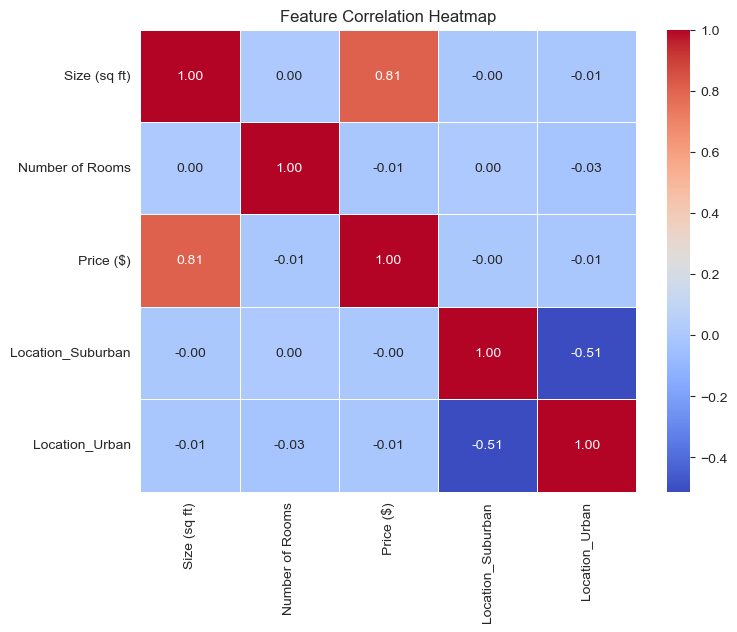

In [7]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Define predictors (X) and target variable (y)
X = data.drop(columns=["Price ($)"])
y = data["Price ($)"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
model.coef_, model.intercept_

(array([ 6.70824817e+05, -9.63100721e+03,  5.25482867e+02,  1.15110830e+03]),
 114417.92746202956)

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, r2

(20996496510.441837, 0.6610330750203341)

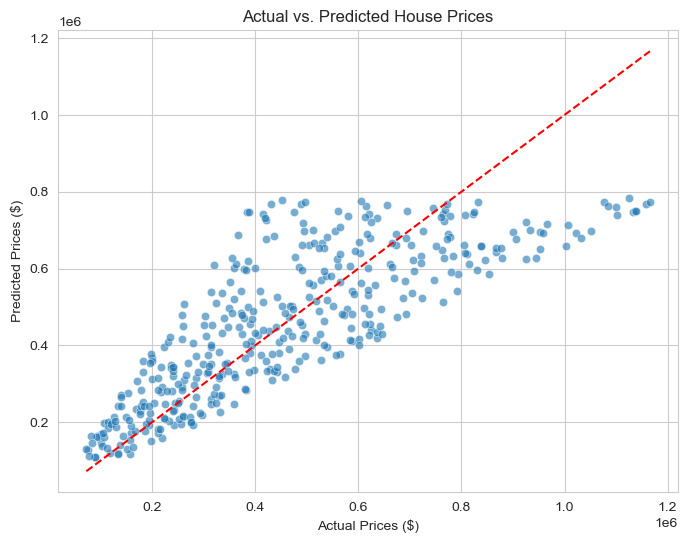

In [10]:
# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect predictions line
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted House Prices")
plt.show()